In [85]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering, AffinityPropagation, MiniBatchKMeans
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [86]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
boston = pd.read_csv(data_path)
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [87]:
boston.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [88]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [89]:
# not gonna iterate, just gonna get it done
boston['10k'] = pd.to_numeric(boston['10k'], errors='coerce')
boston['25k'] = pd.to_numeric(boston['25k'], errors='coerce')
boston['35k'] = pd.to_numeric(boston['35k'], errors='coerce')
boston['30k'] = pd.to_numeric(boston['30k'], errors='coerce')
boston['5k'] = pd.to_numeric(boston['5k'], errors='coerce')
boston['half'] = pd.to_numeric(boston['half'], errors='coerce')
boston['20k'] = pd.to_numeric(boston['20k'], errors='coerce')
boston['40k'] = pd.to_numeric(boston['40k'], errors='coerce')


In [90]:
boston.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [91]:
boston.isnull().sum()

10k             50
name             0
division         0
25k            216
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k             34
overall          0
pace             0
state         2576
30k             40
5k              52
half            72
20k             51
country          0
city             1
40k             39
dtype: int64

In [92]:
len(boston['pace'].unique())

727

In [93]:
# init algorithms here
from sklearn.model_selection import train_test_split

# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# spectral clustering
from sklearn.cluster import SpectralClustering

# affinity propogation
from sklearn.cluster import AffinityPropagation


In [94]:
# pick a damn y variable already
boston.columns.get_loc('pace')

12

In [95]:
# gonna drop the citizenship('ctz') and state columns cuz of high missing value counts
# then drop the other rows
boston = boston.drop(['ctz', 'state'], axis=1)
boston.dropna(axis=0, how='any', inplace=True)
boston.isnull().sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [96]:
from sklearn.preprocessing import normalize

boston['10k'] = normalize(boston['10k'].values.reshape(-1,1))
boston['25k'] = normalize(boston['25k'].values.reshape(-1,1))
boston['35k'] = normalize(boston['35k'].values.reshape(-1,1))
boston['30k'] = normalize(boston['30k'].values.reshape(-1,1))
boston['5k'] = normalize(boston['5k'].values.reshape(-1,1))
boston['half'] = normalize(boston['half'].values.reshape(-1,1))
boston['20k'] = normalize(boston['20k'].values.reshape(-1,1))
boston['40k'] = normalize(boston['40k'].values.reshape(-1,1))


In [103]:
# Make X and Y here
# all the other examples for clustering don't have cat variables without numerical values
X = boston.iloc[:, [0,2,3,5,6,8,9,10,12,13,14,15,18]]
y = boston.iloc[:, 11]
# don't know if y needs to be binary...

In [118]:
# split your data into training and test sets.
# roll it down to 2 features so we can graph this stuff!

X_pca = PCA(2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.9,
    random_state=42)

In [119]:
# Mean Shift!
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


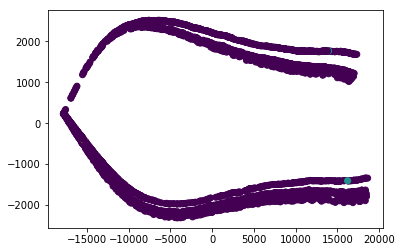

Comparing the assigned categories to the ones in the data:
col_0  0  1  2
pace          
4.92   1  0  0
5.23   1  0  0
5.27   2  0  0
5.40   1  0  0
5.43   1  0  0
5.60   1  0  0
5.62   1  0  0
5.68   1  0  0
5.73   1  0  0
5.75   1  0  0
5.78   1  0  0
5.80   1  0  0
5.88   1  0  0
5.90   3  0  0
5.92   3  0  0
5.93   2  0  0
5.95   2  0  0
5.98   2  0  0
6.00   1  0  0
6.02   1  0  0
6.03   3  0  0
6.07   3  0  0
6.08   3  0  0
6.10   4  0  0
6.12   2  0  0
6.13   1  0  0
6.15   1  0  0
6.17   2  0  0
6.20   3  0  0
6.22   2  0  0
...   .. .. ..
14.42  1  0  0
14.43  1  0  0
14.45  2  0  0
14.47  2  0  0
14.48  2  0  0
14.52  1  0  0
14.53  1  0  0
14.55  1  0  0
14.57  1  0  0
14.58  1  0  0
14.60  1  0  0
14.62  1  0  0
14.65  3  0  0
14.67  1  0  0
14.68  1  0  0
14.70  3  0  0
14.72  1  0  0
14.78  2  0  0
14.83  2  0  0
14.88  1  0  0
15.02  3  0  0
15.05  1  0  0
15.12  2  0  0
15.15  1  0  0
15.37  1  0  0
15.38  2  0  0
15.55  1  0  0
15.98  1  0  0
16.18  1  0  0
16.48  1  0

In [120]:
# We think we know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [ ]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
